/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_8492/2490257284.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values, palette="viridis")
/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_8492/2490257284.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values, palette="magma")


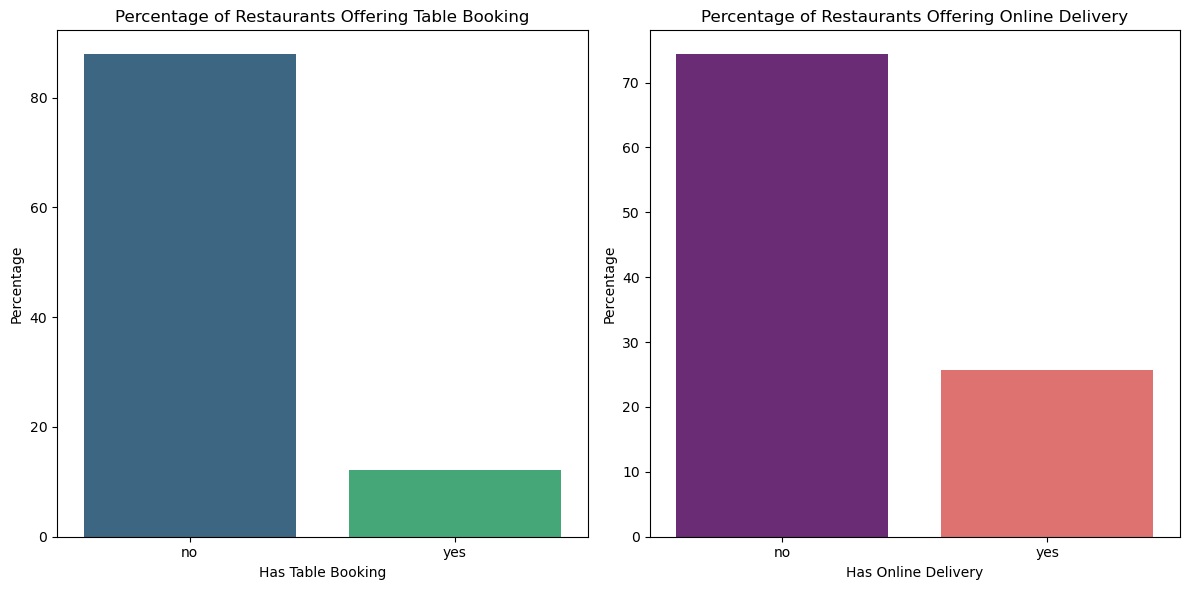

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_8492/2490257284.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["With Table Booking", "Without Table Booking"], y=[avg_rating_table_booking, avg_rating_no_table_booking], palette="coolwarm")


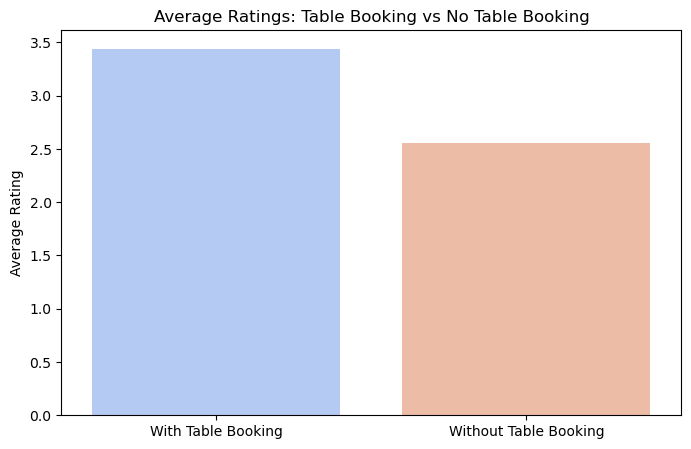

<Figure size 1000x600 with 0 Axes>

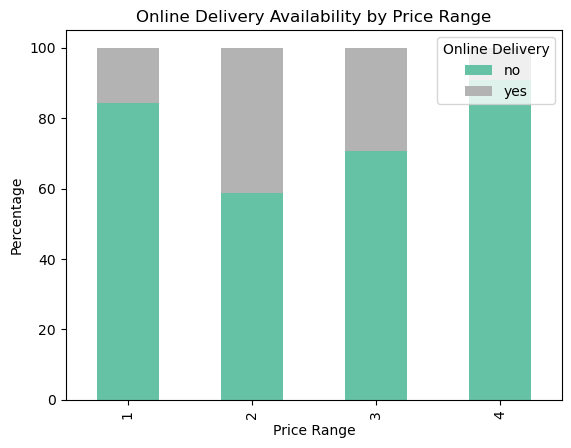

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_8492/2490257284.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette=["red" if p == highest_avg_rating_price else "blue" for p in avg_rating_by_price.index])


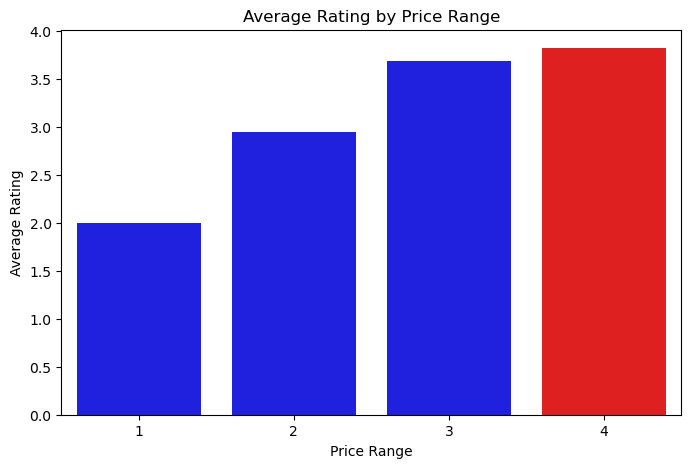

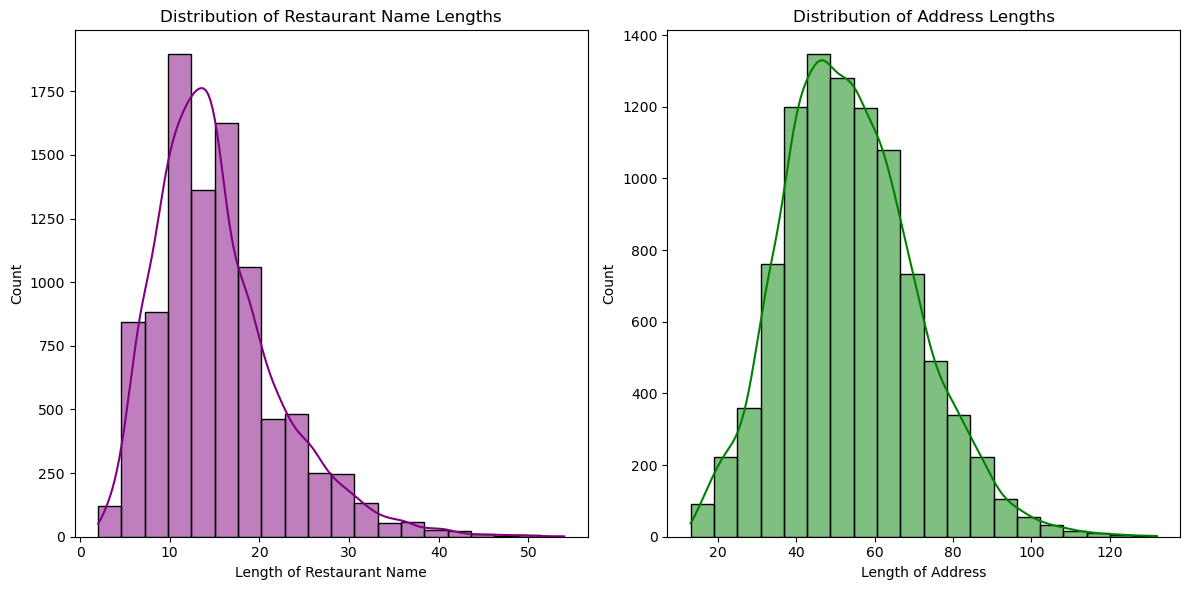

Percentage of restaurants offering table booking:
Has Table booking
no     87.875615
yes    12.124385
Name: proportion, dtype: float64

Percentage of restaurants offering online delivery:
Has Online delivery
no     74.337766
yes    25.662234
Name: proportion, dtype: float64

Average rating comparison:
With table booking: 3.44
Without table booking: 2.56

Online delivery availability by price range:
Has Online delivery         no        yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Most common price range: 1

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

Price range with the highest average rating: 4

Sample data with new features:
          Restaurant Name  Restaurant Name Length  Address Length  \
0        Le Petit Souffl

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)

# Convert relevant columns to lowercase for consistency
df["Has Table booking"] = df["Has Table booking"].str.lower()
df["Has Online delivery"] = df["Has Online delivery"].str.lower()

# Calculate percentage of restaurants offering table booking and online delivery
table_booking_percentage = (df["Has Table booking"].value_counts(normalize=True) * 100)
online_delivery_percentage = (df["Has Online delivery"].value_counts(normalize=True) * 100)

# Compare average ratings for restaurants with and without table booking
avg_rating_table_booking = df[df["Has Table booking"] == "yes"]["Aggregate rating"].mean()
avg_rating_no_table_booking = df[df["Has Table booking"] == "no"]["Aggregate rating"].mean()

# Analyze online delivery availability among different price ranges
online_delivery_by_price = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100

# Determine the most common price range
most_common_price_range = df["Price range"].mode()[0]

# Calculate the average rating for each price range
avg_rating_by_price = df.groupby("Price range")["Aggregate rating"].mean()

# Identify the color that represents the highest average rating
highest_avg_rating_price = avg_rating_by_price.idxmax()

# Extract additional features
# Length of restaurant name
df["Restaurant Name Length"] = df["Restaurant Name"].apply(len)

# Length of address
df["Address Length"] = df["Address"].apply(len)

# Encode categorical variables
# Convert "Has Table booking" to binary (1 for Yes, 0 for No)
df["Has Table Booking (Binary)"] = df["Has Table booking"].map({"yes": 1, "no": 0})

# Convert "Has Online delivery" to binary (1 for Yes, 0 for No)
df["Has Online Delivery (Binary)"] = df["Has Online delivery"].map({"yes": 1, "no": 0})

# Visualization and saving plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values, palette="viridis")
plt.title("Percentage of Restaurants Offering Table Booking")
plt.ylabel("Percentage")
plt.xlabel("Has Table Booking")
plt.savefig("table_booking_percentage.png")

plt.subplot(1, 2, 2)
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values, palette="magma")
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.ylabel("Percentage")
plt.xlabel("Has Online Delivery")
plt.savefig("online_delivery_percentage.png")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=["With Table Booking", "Without Table Booking"], y=[avg_rating_table_booking, avg_rating_no_table_booking], palette="coolwarm")
plt.title("Average Ratings: Table Booking vs No Table Booking")
plt.ylabel("Average Rating")
plt.savefig("avg_ratings_table_booking.png")
plt.show()

plt.figure(figsize=(10, 6))
online_delivery_by_price.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Online Delivery", loc="upper right")
plt.savefig("online_delivery_by_price.png")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette=["red" if p == highest_avg_rating_price else "blue" for p in avg_rating_by_price.index])
plt.title("Average Rating by Price Range")
plt.ylabel("Average Rating")
plt.xlabel("Price Range")
plt.savefig("avg_rating_by_price.png")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["Restaurant Name Length"], bins=20, kde=True, color='purple')
plt.title("Distribution of Restaurant Name Lengths")
plt.xlabel("Length of Restaurant Name")
plt.ylabel("Count")
plt.savefig("restaurant_name_length_distribution.png")

plt.subplot(1, 2, 2)
sns.histplot(df["Address Length"], bins=20, kde=True, color='green')
plt.title("Distribution of Address Lengths")
plt.xlabel("Length of Address")
plt.ylabel("Count")
plt.savefig("address_length_distribution.png")

plt.tight_layout()
plt.show()

# Print results
print("Percentage of restaurants offering table booking:")
print(table_booking_percentage)
print("\nPercentage of restaurants offering online delivery:")
print(online_delivery_percentage)
print("\nAverage rating comparison:")
print(f"With table booking: {avg_rating_table_booking:.2f}")
print(f"Without table booking: {avg_rating_no_table_booking:.2f}")
print("\nOnline delivery availability by price range:")
print(online_delivery_by_price)
print("\nMost common price range:", most_common_price_range)
print("\nAverage rating for each price range:")
print(avg_rating_by_price)
print("\nPrice range with the highest average rating:", highest_avg_rating_price)
print("\nSample data with new features:")
print(df[["Restaurant Name", "Restaurant Name Length", "Address Length", "Has Table Booking (Binary)", "Has Online Delivery (Binary)"]].head())
